### User Overview analysis 
 - identifying the top 10 handsets used by the customers.
 - identify the top 3 handset manufacturers
  - identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams

#### importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

#### read cleaned csv data


In [4]:
try:
    clean_data = pd.read_csv('../data/clean_data.csv')
except BaseException:
    logging.error('either file not found or wrong format')
    
print(clean_data.shape)
clean_data = clean_data.dropna()
clean_data.info()

(150000, 45)
<class 'pandas.core.frame.DataFrame'>
Index: 148346 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148346 non-null  float64
 1   Start                           148346 non-null  object 
 2   Start ms                        148346 non-null  float64
 3   End                             148346 non-null  object 
 4   End ms                          148346 non-null  float64
 5   Dur. (ms)                       148346 non-null  float64
 6   IMSI                            148346 non-null  float64
 7   MSISDN/Number                   148346 non-null  float64
 8   IMEI                            148346 non-null  float64
 9   Last Location Name              148346 non-null  object 
 10  Avg RTT DL (ms)                 148346 non-null  float64
 11  Avg RTT UL (ms)                 148346 non-null  float64
 12  Avg Bear

#### top 10 handsets used by the customers

<Axes: xlabel='Handset Type'>

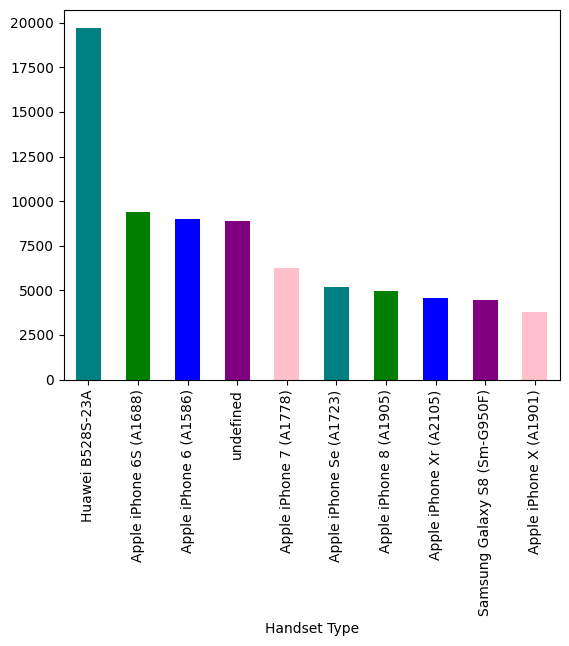

In [5]:
# top 10 handsets used by the customers
top_handsets = clean_data['Handset Type'].value_counts().head(10)
top_handsets[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])

#### top 3 handset manufacturers

<Axes: xlabel='Handset Manufacturer'>

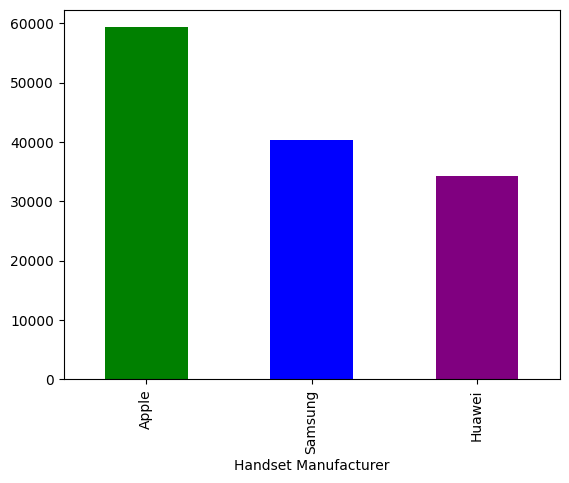

In [6]:
# top 3 handset manufacturers
top_manufacturers = clean_data['Handset Manufacturer'].value_counts().head(3)
top_manufacturers[:3].plot(kind='bar', color=[ 'green', 'blue','purple'])

#### top 5 handsets per top 3 handset manufacturer

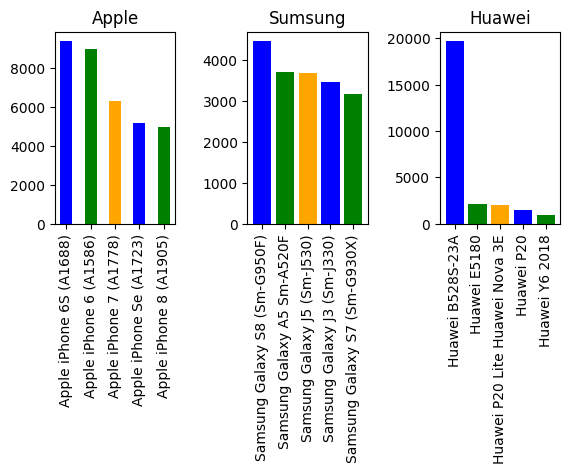

In [7]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]
handset = handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()
apple = handset.Apple[:5]
sumsung = handset.Samsung[:5]
huawei = handset.Huawei[:5]

fig, ax = plt.subplots(1, 3)

ax[0].bar(apple.keys(), apple.values, tick_label=apple.keys(),
          width=.5, color=['blue', 'green', 'orange'])
ax[0].set_title('Apple')
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].bar(sumsung.keys(), sumsung.values, tick_label=sumsung.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[1].set_title('Sumsung')
ax[1].tick_params(axis='x', labelrotation=90)

ax[2].bar(huawei.keys(), huawei.values, tick_label=huawei.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[2].set_title('Huawei')
ax[2].tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(left=0.2, right=0.99,
                    bottom=0.2, top=0.6,
                    wspace=0.6, hspace=0.4)

### Top 10 location

45379 users
Number of posts per user


<Axes: xlabel='Last Location Name'>

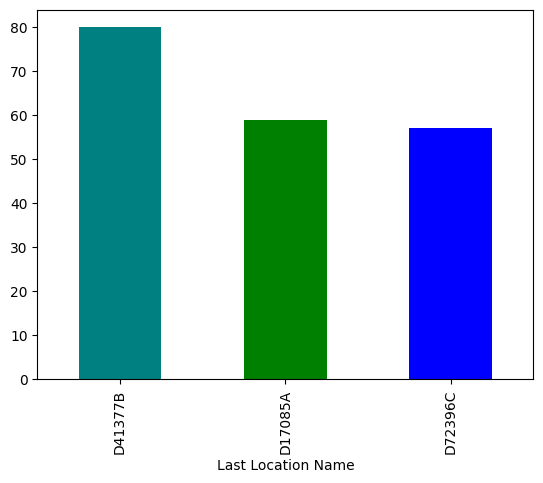

In [8]:
handset_manufacturer = clean_data['Last Location Name'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])

### Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

        MSISDN/Number  Number of xDR Sessions  Total Session Duration (s)  \
0        3.360100e+10                       1                     116.720   
1        3.360100e+10                       1                     181.230   
2        3.360100e+10                       1                     134.969   
3        3.360101e+10                       1                      49.878   
4        3.360101e+10                       2                      37.104   
...               ...                     ...                         ...   
106347   3.379000e+10                       1                       8.810   
106348   3.379000e+10                       1                     140.988   
106349   3.197021e+12                       1                     877.385   
106350   3.370000e+14                       1                     253.030   
106351   8.823971e+14                       1                     869.844   

        Total Download Data (Bytes)  Total Upload Data (Bytes)  \
0        

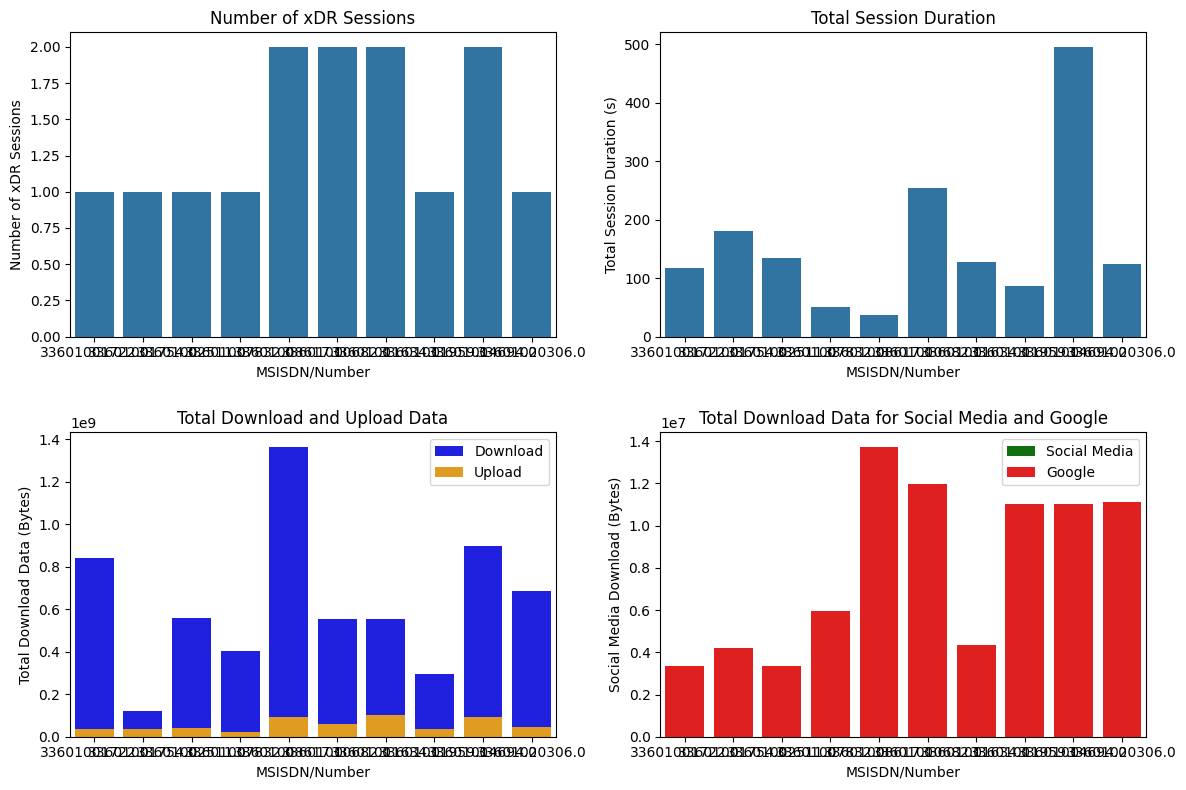

In [9]:

# Convert session duration to seconds (assuming 'Dur. (ms)' is in milliseconds)
clean_data['Session Duration (s)'] = clean_data['Dur. (ms)'] / 1000

# Group by 'MSISDN/Number' and aggregate information
aggregated_data = clean_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                   # Number of xDR sessions
    'Session Duration (s)': 'sum',          # Total session duration
    'Total DL (Bytes)': 'sum',              # Total download data
    'Total UL (Bytes)': 'sum',              # Total upload data
    'Social Media DL (Bytes)': 'sum',       # Total download data for Social Media
    'Social Media UL (Bytes)': 'sum',       # Total upload data for Social Media
    'Google DL (Bytes)': 'sum',             # Total download data for Google
    'Google UL (Bytes)': 'sum',             # Total upload data for Google
    
})

# Rename columns for clarity
aggregated_data.columns = [
    'Number of xDR Sessions',
    'Total Session Duration (s)',
    'Total Download Data (Bytes)',
    'Total Upload Data (Bytes)',
    'Social Media Download (Bytes)',
    'Social Media Upload (Bytes)',
    'Google Download (Bytes)',
    'Google Upload (Bytes)',
]

# Reset index to make 'MSISDN/Number' a regular column
aggregated_data.reset_index(inplace=True)

# Display the aggregated data
print(aggregated_data)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the number of xDR sessions
plt.subplot(2, 2, 1)
sns.barplot(x='MSISDN/Number', y='Number of xDR Sessions', data=aggregated_data.head(10))
plt.title('Number of xDR Sessions')

# Plot the total session duration
plt.subplot(2, 2, 2)
sns.barplot(x='MSISDN/Number', y='Total Session Duration (s)', data=aggregated_data.head(10))
plt.title('Total Session Duration')

# Plot the total download and upload data
plt.subplot(2, 2, 3)
sns.barplot(x='MSISDN/Number', y='Total Download Data (Bytes)', data=aggregated_data.head(10), label='Download', color='blue')
sns.barplot(x='MSISDN/Number', y='Total Upload Data (Bytes)', data=aggregated_data.head(10), label='Upload', color='orange')
plt.title('Total Download and Upload Data')
plt.legend()

# Plot the total download data for Social Media and Google
plt.subplot(2, 2, 4)
sns.barplot(x='MSISDN/Number', y='Social Media Download (Bytes)', data=aggregated_data.head(10), label='Social Media', color='green')
sns.barplot(x='MSISDN/Number', y='Google Download (Bytes)', data=aggregated_data.head(10), label='Google', color='red')
plt.title('Total Download Data for Social Media and Google')
plt.legend()

plt.tight_layout()
plt.show()


#### mean, median, mode

In [10]:
central_tendency_measure = pd.DataFrame(
    { 
     'mean': clean_data.mean(numeric_only=True).values, 
     'median': clean_data.median(numeric_only=True).values,
     'mode': clean_data.mode(numeric_only=True).rename(columns={0: "mode"}).iloc[0].values,
     'min': clean_data.min(numeric_only=True).values,
     'max': clean_data.max(numeric_only=True).values
    }, index=clean_data.select_dtypes(include=np.number).columns.tolist())

central_tendency_measure

,mean,median,mode,min,max
Bearer Id,1.014659e+19,7.349883e+18,1.304243e+19,6.917538e+18,1.318654e+19
Start ms,4.992189e+02,4.990000e+02,3.410000e+02,0.000000e+00,9.990000e+02
End ms,4.986243e+02,5.000000e+02,8.720000e+02,0.000000e+00,9.990000e+02
Dur. (ms),1.051294e+05,8.639900e+04,8.639900e+04,7.142000e+03,1.859336e+06
IMSI,2.082016e+14,2.082015e+14,2.082014e+14,2.040471e+14,2.082522e+14
MSISDN/Number,4.191542e+10,3.366371e+10,3.362632e+10,3.360100e+10,8.823971e+14
IMEI,4.849938e+13,3.572231e+13,3.518231e+13,4.400152e+11,9.900120e+13
Avg RTT DL (ms),1.066723e+02,5.400000e+01,1.097957e+02,0.000000e+00,9.692300e+04
Avg RTT UL (ms),1.763891e+01,7.000000e+00,1.766288e+01,0.000000e+00,7.120000e+03
Avg Bearer TP DL (kbps),1.329063e+04,6.300000e+01,2.300000e+01,0.000000e+00,3.781600e+05


#### histogram of session duration to the most common session lengths and identify any unusual patterns

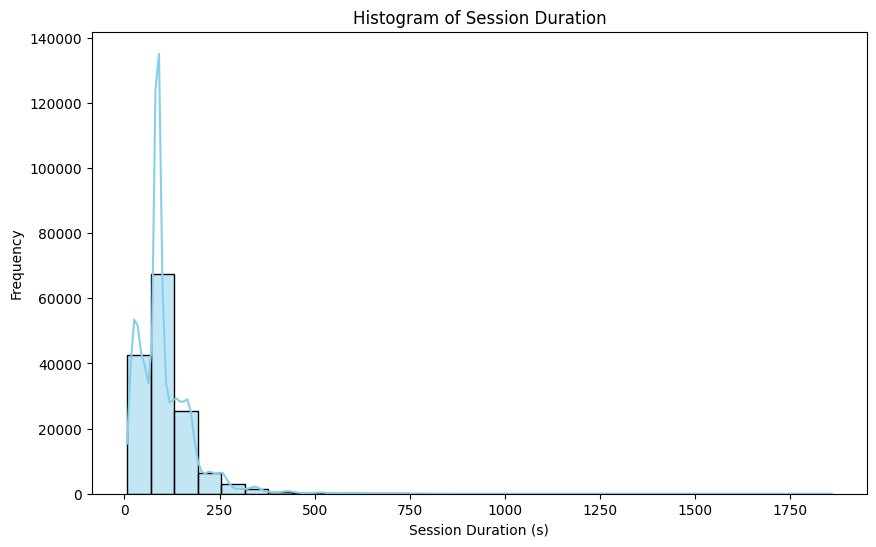

In [11]:
session_duration = clean_data['Session Duration (s)']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(session_duration, bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.title('Histogram of Session Duration')
plt.xlabel('Session Duration (s)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### box plot of download volumes to show the spread of data and highlight potential outliers

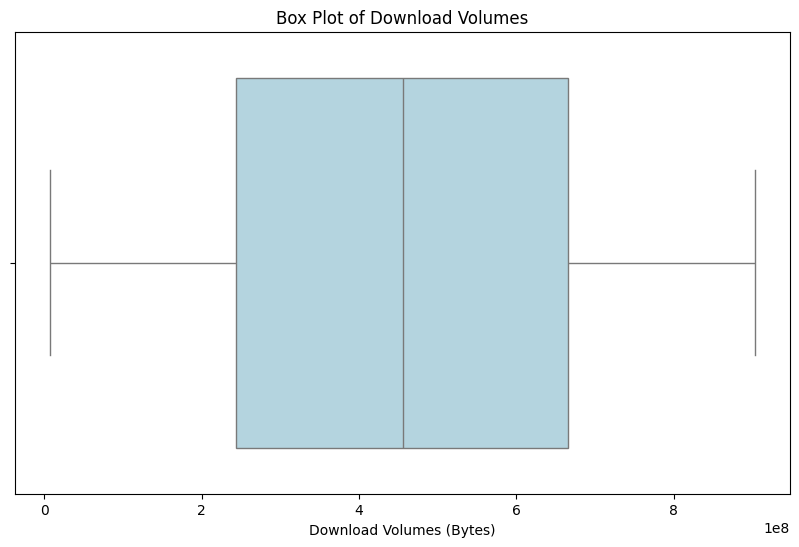

In [12]:
download_volumes = clean_data['Total DL (Bytes)']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=download_volumes, color='lightblue')

# Set plot labels and title
plt.title('Box Plot of Download Volumes')
plt.xlabel('Download Volumes (Bytes)')

# Show the plot
plt.show()

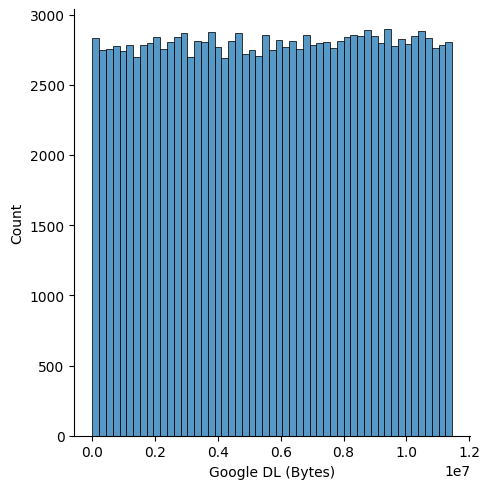

In [13]:
#plot_hist(clean_data, "Bea", "blue")
sns.displot(data=clean_data, x=clean_data['Google DL (Bytes)'])

In [14]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

#### Distributions

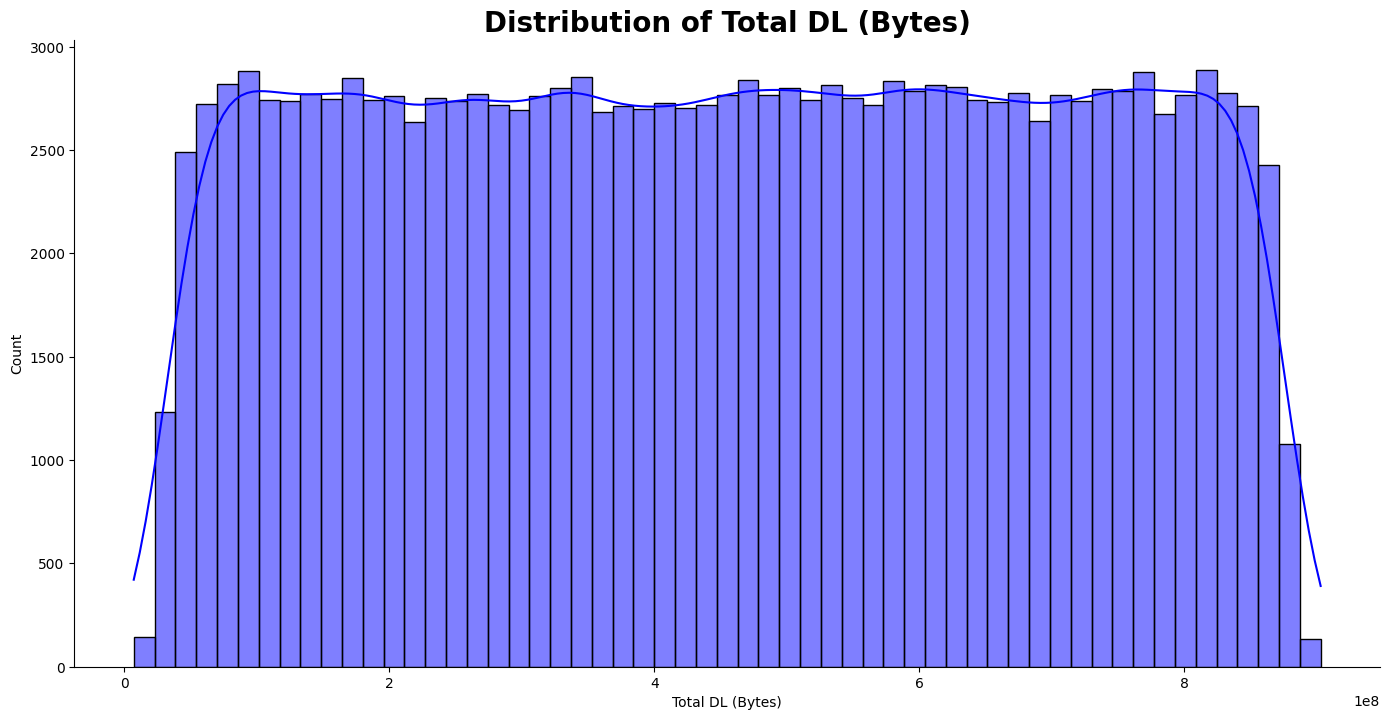

In [15]:
plot_hist(clean_data, "Total DL (Bytes)", "blue")

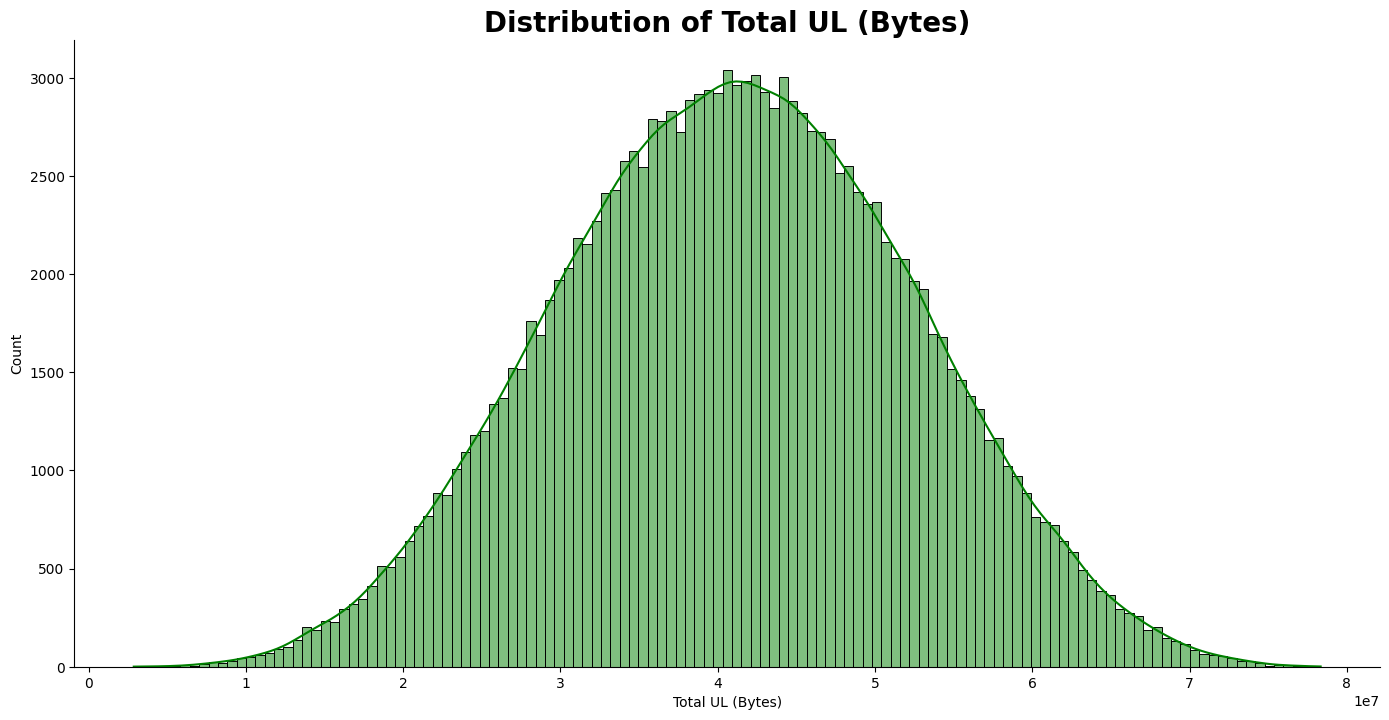

In [16]:
plot_hist(clean_data, "Total UL (Bytes)", "green")

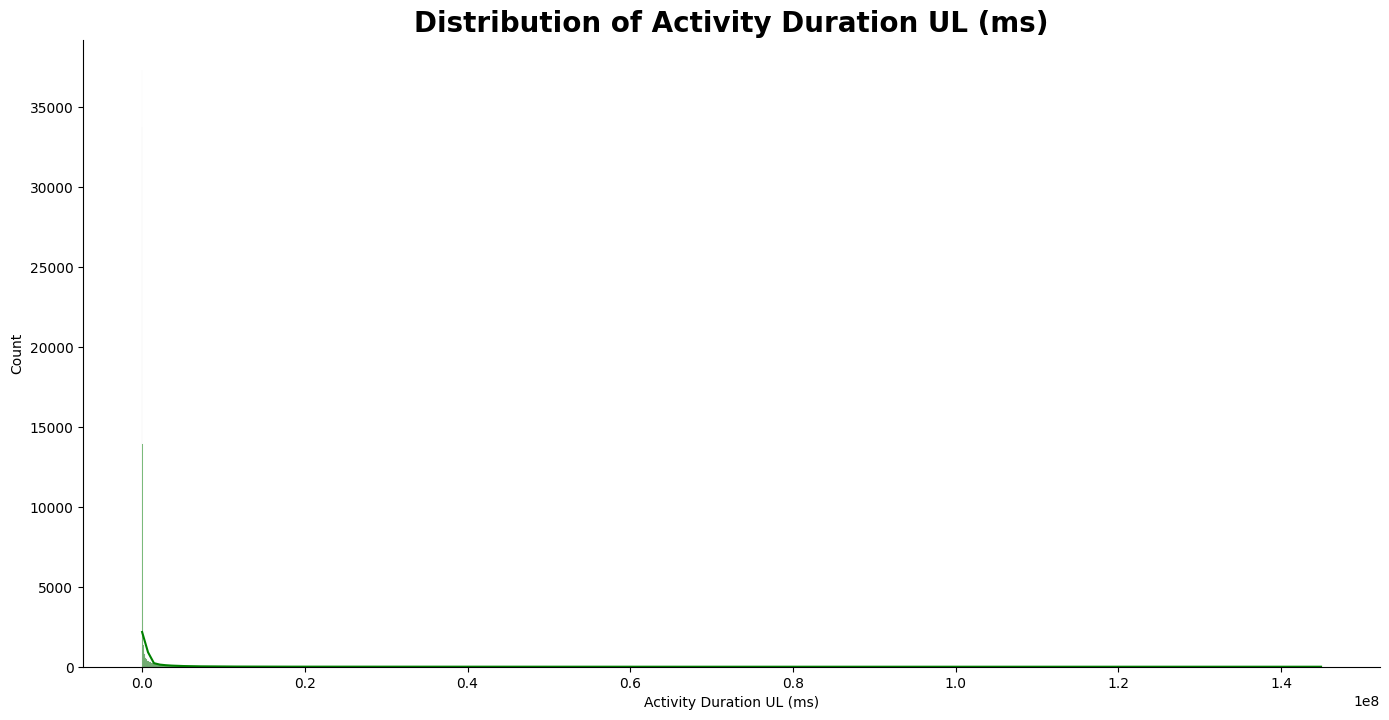

In [17]:
plot_hist(clean_data, "Activity Duration UL (ms)", "green")

#### relationship between 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)'.

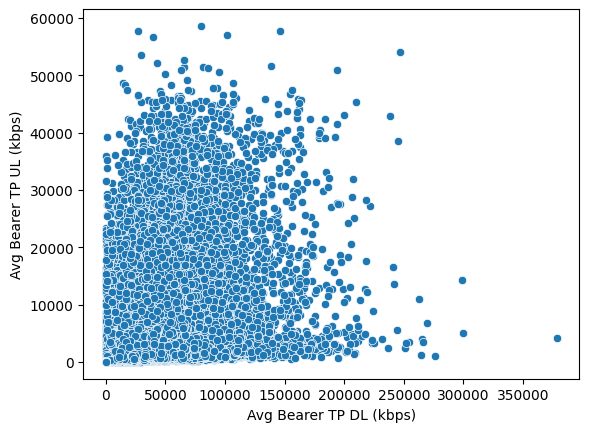

In [18]:
sns.scatterplot(x='Avg Bearer TP DL (kbps)', y='Avg Bearer TP UL (kbps)', data=clean_data)
plt.show()

#### Correlation Matrix for numerical values

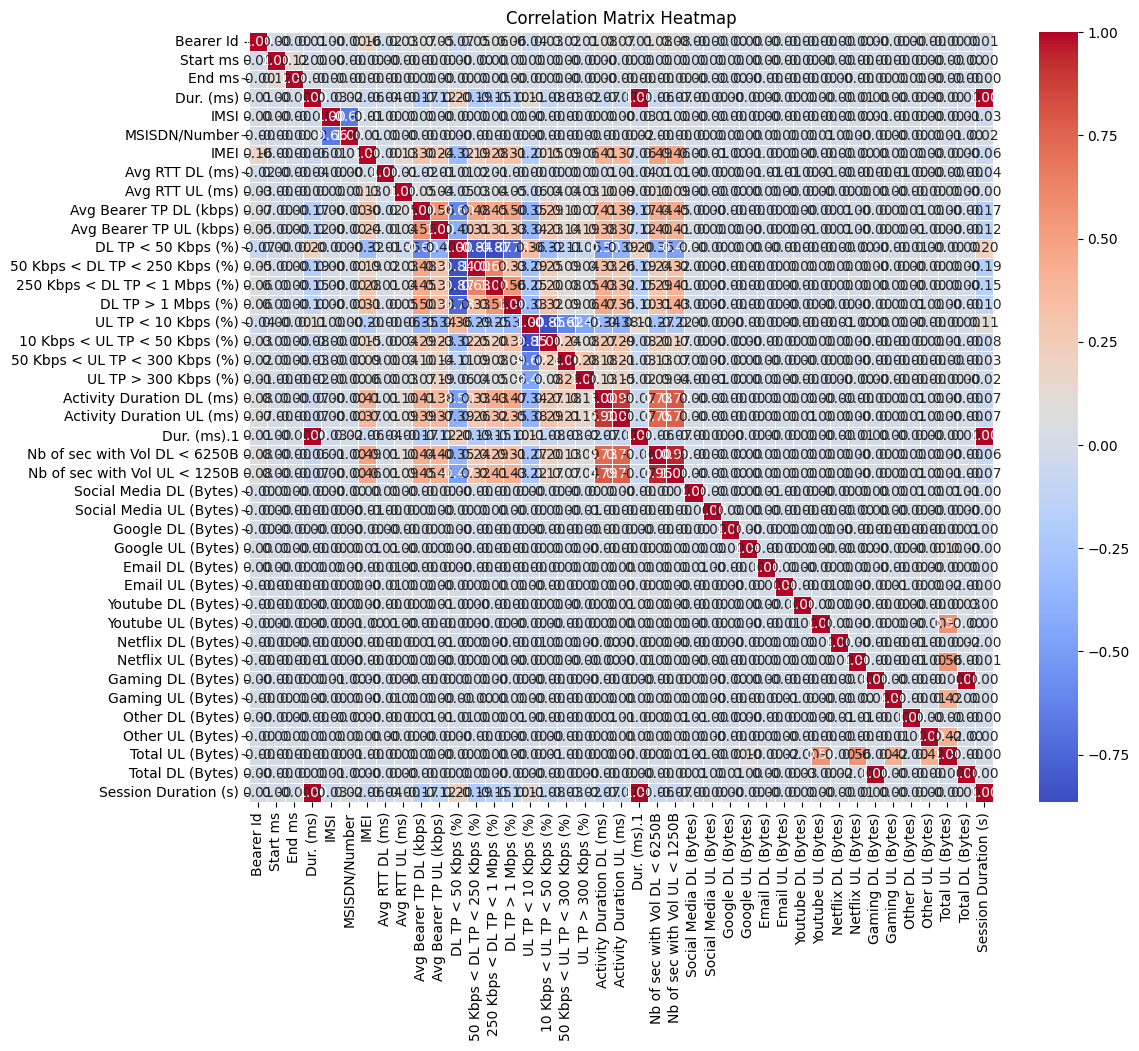

In [19]:
numeric_df = clean_data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# Print or visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Heatmap for Categorical and Numerical Variables

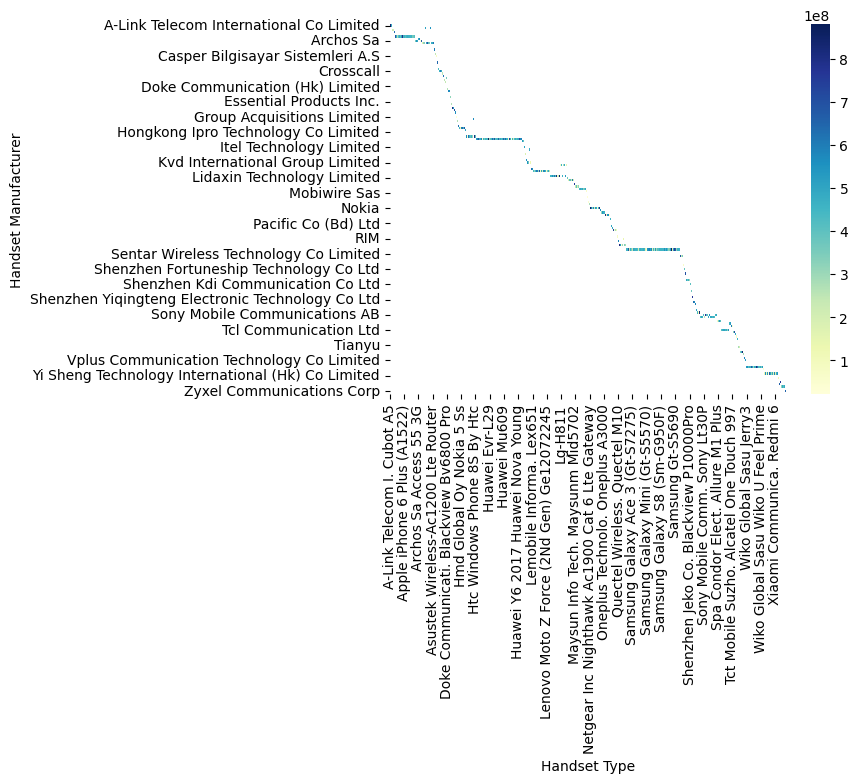

In [20]:
sns.heatmap(clean_data.groupby(['Handset Manufacturer', 'Handset Type'])['Total DL (Bytes)'].mean().unstack(), cmap="YlGnBu")
plt.show()

   Duration Decile  Total DL (Bytes)  Total UL (Bytes)
0                0      1.057179e+13      9.529608e+11
1                1      1.131399e+13      1.024670e+12
2                2      1.070532e+13      9.687951e+11
3                3      1.276368e+13      1.153985e+12
4                4      2.209808e+13      1.999599e+12


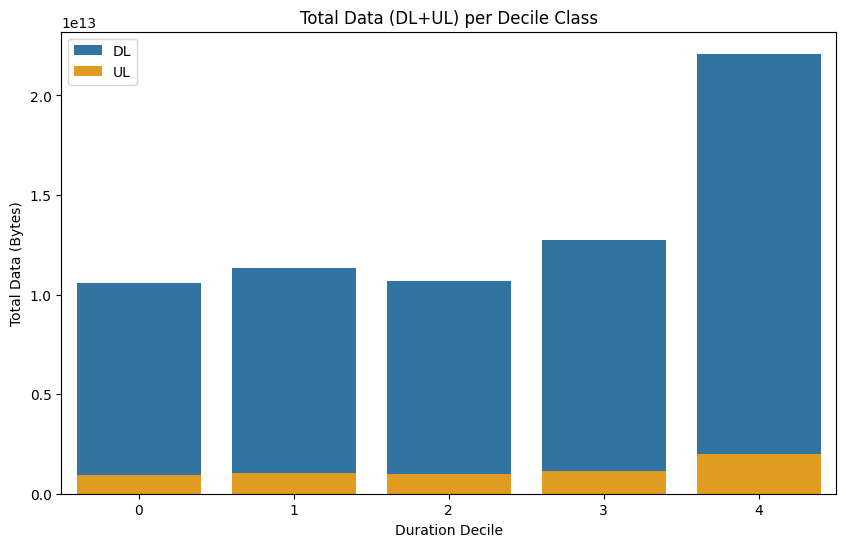

In [21]:
clean_data['Dur. (s)'] = clean_data['Dur. (ms)'] / 1000

# Group by 'MSISDN/Number' and calculate the total duration and total data
user_summary = clean_data.groupby('MSISDN/Number').agg({
    'Dur. (s)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Compute deciles based on total duration
user_summary['Duration Decile'] = pd.qcut(user_summary['Dur. (s)'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False)

# Group by decile class and calculate total data for each decile
decile_summary = user_summary.groupby('Duration Decile').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Display the result
print(decile_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x='Duration Decile', y='Total DL (Bytes)', data=decile_summary, label='DL')
sns.barplot(x='Duration Decile', y='Total UL (Bytes)', data=decile_summary, label='UL', color='orange')
plt.xlabel('Duration Decile')
plt.ylabel('Total Data (Bytes)')
plt.title('Total Data (DL+UL) per Decile Class')
plt.legend()
plt.show()